# **Going beyond the no-cloning theorem with IBM QX**

### ***Abstract:***

In this tutorial, we will look at a very important theorem of quantum mechanics called **the no-cloning theorem** and see how it is still possible to do a specific kind of imperfect cloning using **optimal cloning machines**. We will see several examples of such cloning machines, in particular, **a universal quantum cloning machine** and **a phase-covariant quantum cloning machine** for qubit quantum states. We will also discuss why the optimal cloning can be interesting for applications of quantum mechanics.

## **Table of contents:**

### **The "No-cloning theorem" in quantum mechanics**

### **Trivial ways of cloning: gaining intuition**

### **Clever ways of cloning: getting a pair of pretty good clones**

### **Why is this interesting?**

### **References**

## **The "No-cloning theorem" in quantum mechanics**

In 1982 Wooters and Zurek in a work <a href="https://www.nature.com/articles/299802a0">"A single quantum cannot be cloned"</a> derived a theorem, which emerged as a generalization of observations and assumptions about properties of quantum mechanical systems known until that moment - the **no-cloning theorem**. The statement of this theorem is as follows:

> *An unknown quantum state cannot be cloned*

In other words, there is no such a unitary transformation, which takes as input a particular arbitrary (unknown) quantum state and outputs two or more *perfect clones* of such state. 

What does it mean? It means that the *COPY* operation, which we get used to in classical information processing (imagine making a file copy on your computer), is nonexistent for an arbitrary quantum state. Working with classical bits (0 or 1) we have no trouble to show a COPY operation exactly. Consider a transformation $U_{copy}$ which takes as input a couple of bits: a target bit (t), which we want to have a copy of, and an ancillary bit (a), which is going to become a copy. The transformation is the following:

$U_{copy}[(t, a)] = (t, a \oplus t)$

where $\oplus$ is a sum modulo 2. It acts like copying classical bits: 

$(0, 0) \longrightarrow (0, 0 \oplus 0) = (0, 0)$ 

$(1, 0) \longrightarrow (1, 0 \oplus 1) = (1, 1)$

If the target bit has 0 value, the operation does nothing to the ancillary bit, yet if the target is 1, a bit flip operation applies to the ancilla. The whole operation is called CNOT ("controlled-NOT"). Obviously, it does the copy of the target bit state on the ancillary bit.

Can we do the same thing for qubits? The quantum circuit computation model has the CNOT operation, so probably it is possible to use it for making copies of qubit states. Let's replace classical bits with qubits and see if it is so.

**A cloner unitary:** U = CNOT

**A state to be cloned:** $\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta\left|1\right\rangle$

In quantum mechanics, if we want to find out how a certain operator acts on an arbitrary quantum state, we investigate its action on the basis states and then extend it by linearity on superpositions.

In [1]:
# load functions and modules we need
import numpy as np
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

First, let's take the first qubit basis state $\left|0\right\rangle$ as an input to our cloning unitary:

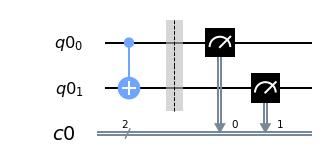

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr, cr)
circ.cx(0, 1)
circ.barrier(range(2))
circ.measure(range(2), range(2))
circ.draw(output='mpl')                # drawing the circuit, using matplotlib style

Running the circuit on the qasm simulator, we obtain counts of measurements of the final state in the computational basis ($\left|0\right\rangle$, $\left|1\right\rangle$). Let's look at the outcomes histogram:

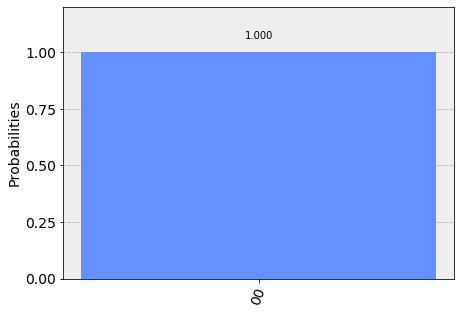

In [3]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1024)
result = job.result()

counts = result.get_counts(circ)
plot_histogram(counts)                # visualizing final counts

As we can see, the resulting state is a factorizable state $\left|0\right\rangle \otimes \left|0\right\rangle$. We expected that!

We proceed with the second qubit basis state $\left|1\right\rangle$ as an input to our cloning unitary:

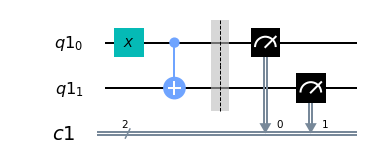

In [4]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr, cr)
circ.x(0)
circ.cx(0, 1)
circ.barrier(range(2))
circ.measure(range(2), range(2))
circ.draw(output='mpl')                # drawing the circuit, using matplotlib style

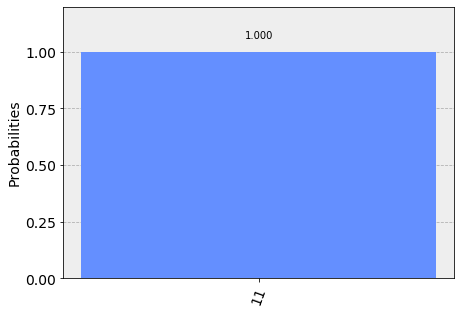

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1024)
result = job.result()

counts = result.get_counts(circ)
plot_histogram(counts)  

Now we have another factorizable state $\left|1\right\rangle\otimes\left|1\right\rangle$. Everything is ok so far!

The difference between classical and quantum bits starts when it comes to superposition - an innate property of qubits as quantum systems, which classical bits lack. Let's take a superposition of the basis $\frac{1}{\sqrt2}\left|0\right\rangle + \frac{1}{\sqrt2}\left|1\right\rangle$ states and try to make a clone of it:

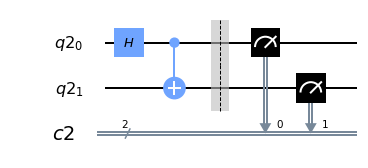

In [6]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr, cr)
circ.h(0)                              # Hadamard gate to create superposition of basis states
circ.cx(0, 1)
circ.barrier(range(2))
circ.measure(range(2), range(2))
circ.draw(output='mpl')                # drawing the circuit, using matplotlib style

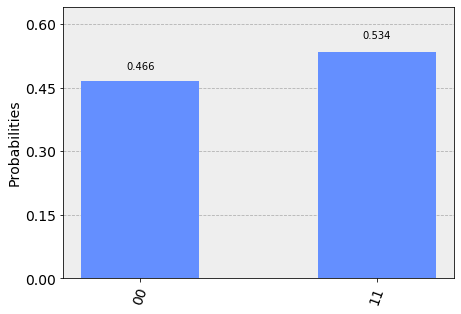

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1024)
result = job.result()

counts = result.get_counts(circ)
plot_histogram(counts)  

Have we succeeded? Let's take a closer look: if we managed to produce a clone of the superposition state, the final state would be the following:

$(\frac{1}{\sqrt{2}}\left|0\right\rangle + \frac{1}{\sqrt2}\left|1\right\rangle)\otimes(\frac{1}{\sqrt{2}}\left|0\right\rangle + \frac{1}{\sqrt{2}}\left|1\right\rangle) = \frac{1}{2}\left|0\right\rangle\left|0\right\rangle + \frac{1}{2}\left|0\right\rangle\left|1\right\rangle + \frac{1}{2}\left|1\right\rangle\left|0\right\rangle + \frac{1}{2}\left|1\right\rangle\left|1\right\rangle = \left|\Psi_{final}\right\rangle$

Recalling *the Born rule* for quantum measurements, we expect to see the outcome:

$Pr(00) = |\left\langle 00|\Psi_{final}\right\rangle|^{2} = \frac{1}{4}$

$Pr(01) = |\left\langle 01|\Psi_{final}\right\rangle|^{2} = \frac{1}{4}$

$Pr(10) = |\left\langle 10|\Psi_{final}\right\rangle|^{2} = \frac{1}{4}$

$Pr(11) = |\left\langle 11|\Psi_{final}\right\rangle|^{2} = \frac{1}{4}$

Looking back at the resulting histogram, we see quite different results: there are no "01" and "10" pairs at all! If we go through the whole procedure of the last experiment step-by-step, we can easily see where the cloning has failed:

$\left|0\right\rangle\left|0\right\rangle \longrightarrow [\text{apply hadamard to qubit 1}] \longrightarrow \frac{1}{\sqrt{2}}(\left|0\right\rangle + \left|1\right\rangle)\otimes\left|0\right\rangle \longrightarrow [\text{apply CNOT(12) }] \longrightarrow \frac{1}{\sqrt{2}}\left|0\right\rangle\left|0\right\rangle + \frac{1}{\sqrt{2}}\left|1\right\rangle\left|1\right\rangle$

We see, that the final state is a maximally entangled state, which is quite the opposite to a tensor product of quantum states:

$\frac{1}{\sqrt{2}}\left|0\right\rangle\left|0\right\rangle + \frac{1}{\sqrt{2}}\left|1\right\rangle\left|1\right\rangle \neq (\frac{1}{\sqrt{2}}\left|0\right\rangle + \frac{1}{\sqrt{2}}\left|1\right\rangle)\otimes(\frac{1}{\sqrt{2}}\left|0\right\rangle + \frac{1}{\sqrt{2}}\left|1\right\rangle)$

So, we see that using the classical approach to cloning doesn't work when it comes to quantum superpositions of states. But probably there is some complicated unitary transformation which does the cloning. Can we find it if we work harder? The no-cloning theorem prohibits this possibility. To see this, let's look at the proof of this theorem:

**Proof:**

Let $\left|\Psi\right\rangle$ and $\left|\Phi\right\rangle$ be two arbitrary quantum states with a scalar product: $\left\langle\Psi|\Phi\right\rangle$. Let's suppose, that there is a unitary U such that it's outcome is a pair of target state clones:

$U(\left|\Psi\right\rangle\left|{0}\right\rangle) = \left|\Psi\right\rangle\left|\Psi\right\rangle$

$U(\left|\Phi\right\rangle\left|0\right\rangle) = \left|\Phi\right\rangle\left|\Phi\right\rangle$

where $\left|0\right\rangle$ is an arbitrary ancillary state. A unitary transformation is a rotation of a vector in a Hilbert space, so it preserves a scalar product. We can take a scalar product of the left and right hand sides of the expressions above. The result is the following:

$(\left\langle\Psi\right|\left\langle{0}\right|) U^{\dagger}U (\left|\Phi\right\rangle\left|0\right\rangle) = (\left\langle\Psi\right|\left\langle\Psi\right|) (\left|\Phi\right\rangle\left|\Phi\right\rangle)$

Using a property of unitary operators $U^{\dagger}U  = I$, we obtain:

$\left\langle\Psi|\Phi\right\rangle \left\langle{0|0}\right\rangle = \left\langle{\Psi|\Phi}\right\rangle \left\langle{\Psi|\Phi}\right\rangle$

Finally, using the fact that every quantum state is normalized ($\left\langle{0|0}\right\rangle = 1$), we have the following result:

$\left\langle{\Psi|\Phi}\right\rangle = \left\langle{\Psi|\Phi}\right\rangle\left\langle{\Psi|\Phi}\right\rangle$

or, in a more convenient form:

$\left\langle{\Psi|\Phi}\right\rangle(1 - \left\langle{\Psi|\Phi}\right\rangle) = 0$

What does that mean? We assumed that there exists a cloning unitary U. Then, using only basic principles of quantum mechanics, we discovered that, to be perfectly cloned, our "arbitrary quantum states" must satisfy a certain equation on their scalar product. Obviously, the equation is satisfied only when those states are identical states ($\left|{\Psi}\right\rangle = \left|{\Phi}\right\rangle$, so $\left\langle{\Phi|\Psi}\right\rangle = 1$) or orthogonal states ($\left|{\Psi}\right\rangle = \left|{\Phi_{\perp}}\right\rangle$, so $\left\langle{\Phi|\Psi}\right\rangle = 0$).

Thus we can see that the **perfect cloning of an arbitrary unknown quantum state is impossible**. Trying to copy states other than from an orthogonal set leads to entanglement between the target and the ancillary systems. As a consequence, it would be impossible to address pure quantum states to our systems alone and thus have them in the target state.

The no-cloning theorem provides a basic property of quantum mechanics and has an important impact on applications. To name a few, it serves as a solid ground for quantum cryptography, where the impossibility of cloning signal states prohibits invisible eavesdropping for an adversary. It also limits quantum error correction techniques, which are necessary for universal quantum computing. This theorem also has a connection to fundamental questions of quantum mechanics, e.g., the no-signaling requirement of quantum theory and our capability to obtain information from quantum states.

Following the understanding of the impossibility of the **perfect cloning**, a question about the **imperfect cloning** arose. In 1996 Buzek and Hillary published a paper <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.54.1844">"Quantum copying: beyond the no-cloning theorem"</a>, where they showed a way to construct "no so bad" clones of an unknown quantum qubit state with a certain unitary operation. This result emphasized the importance of a question about the limits on information distribution between quantum states. If we cannot make a perfect copy, what is the best we can do?

## **Trivial ways of cloning: gaining intuition**

Before the discussion of the optimal cloning strategies, it is instructive to look at several trivial state cloning strategies.  We will look at two examples: the one based on a measurement of a random basis and the one based on a trivial amplification.

### **Quantum cloning based on a measurement in a random basis**

Suppose that the target state is a qubit quantum state $\left|{a}\right\rangle$. We take a random state $\left|{+b}\right\rangle$ from the Bloch sphere and measure the target state $\left|{a}\right\rangle$ projecting it on the state $\left|{+b}\right\rangle$. Because the dimension of the qubit Hilbert space is d=2, we obtain two possible outcomes $\left|{+b}\right\rangle$ or $\left|{-b}\right\rangle$. Then we just prepare a couple of states corresponding to the outcome and say "we have a couple of imperfect clones of the target state".

Lets look at the efficiency of such an approach. Qubit quantum states have the following form:

$\left|{a}\right\rangle = \frac{1}{2}(I + \vec{a}\vec{\sigma})$

$\left|{+b}\right\rangle = \frac{1}{2}(I + \vec{b}\vec{\sigma})$

where $\vec{\sigma}$ is a vector of Pauli matrices $\sigma_{x}$, $\sigma_{y}$, $\sigma_{z}$ and vectors $\vec{a}$ and $\vec{b}$ are parameter vectors of quantum states. Probabilities of measurement outcomes for a certain quantum state $\left|{+b}\right\rangle$ and fidelities of the outcome states with respect to the target state are $P_{+} = |\left\langle{a}|{+b}\right\rangle|^{2} = F_{+}$ and $P_{-} = |\left\langle{a}|{-b}\right\rangle|^{2} = F_{-}$. Then we can calculate the average fidelity of quantum clones by integrating over the surface of the Bloch sphere (because we pick the state $\left|{+b}\right\rangle$ randomly):

$\mathcal{F} = \int_{S_{2}}d\vec{b}(P_{+}F_{+} + P_{-}F_{-}) = \frac{1}{2} + \frac{1}{2}\int_{S_{2}}d\vec{b}(\vec{a}*\vec{b})^{2} = \frac{2}{3} \approx 0.667$

Let's do this "trivial cloning" using qiskit. Picking a qubit state at random is, in essence, applying a random unitary transformation to a computational basis qubit state, so we can do it easily.

In [8]:
import cmath, random
from qiskit.quantum_info import random_state 
# random_state is another way to produce a random quantum state in qiskit!

"""
Uncomment different initial states here to see the cloning results for "random basis measurement" strategy. Also, notice that the average outcome is independent of the target state |a>,
which means it is a universal cloning (on average). We will discuss universality later.
"""
a_state = np.array([1, 0])                                # |0> state
#a_state = np.array([0, 1])                                # |1> state
#a_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])          # |+> state
#a_state = np.array([1/np.sqrt(2), -1/np.sqrt(2)])         # |-> state
#a_state = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])         # |i+> state
#a_state = np.array([1/np.sqrt(2), -1j/np.sqrt(2)])        # |i-> state
#a_state = random_state(2)                                 # an arbitrary qubit state  

# Experiment

N = 2000                                                   # number of clones |b>
F = 0                                                      # initialize fidelity variable

for _ in range(N):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    circ = QuantumCircuit(qr, cr)
    
    # in order to choose a completely random state from the Bloch sphere
    # we need to do rotations with respect to at least 2 different axis.
    
    # 1st axis
    theta = random.uniform(0, np.pi)
    phi = random.uniform(0, 2*np.pi)
    lambd = random.uniform(0, 2*np.pi)
    circ.u3(theta, phi, lambd, qr)
    
    # 2nd axis
    theta = random.uniform(0, np.pi)
    phi = random.uniform(0, 2*np.pi)
    lambd = random.uniform(0, 2*np.pi)
    circ.u3(theta, phi, lambd, qr)
    
    job = execute(circ, Aer.get_backend('statevector_simulator'), shots=8192)
    
    # obtain |+b> vector
    b_state = job.result().get_statevector(circ)
    # obtain |-b> vector
    b_minus_state = np.array([
        abs(b_state[1]), 
        -abs(b_state[0])*cmath.exp(1j*cmath.phase(b_state[1]))
    ])
    # calculate average fidelity of clones
    F += (np.abs(a_state@b_state.conj())**4 + np.abs(a_state@b_minus_state.conj())**4)/N

print("Average cloning fidelity: ", F)

Average cloning fidelity:  0.6876213746324669


### **Quantum cloning based on "a trivial amplification"**

Another trivial strategy for the quantum state cloning is a simple guess about the target state. Suppose we have a target state $\left|{a}\right\rangle$. To do the cloning, we add one more arbitrary quantum state $\left|{b}\right\rangle$ and call this couple of states clones. Let's calculate the fidelity of this cloning. If we choose a particular clone at random, we can equiprobably pick the unperturbed target state $\left|{a}\right\rangle$ and obtain fidelity $F_{a} = 1$ or we can pick the arbitrary state $\left|{b}\right\rangle$ with fidelity $P_{b} = |\left\langle{a}|{b}\right\rangle|^{2} = F_{b}$. The overall cloning fidelity will be

$\mathcal{F} = \frac{1}{2}F_{a} + \frac{1}{2}\int_{S_{2}}d\vec{b}(\frac{1 + (\vec{a}*\vec{b})}{2}) = \frac{3}{4} = 0.75$

We can model this cloning using a quantum circuit presented above.

In [9]:
"""
Uncomment different initial states here to see the cloning results for "a trivial amplification" strategy. Also, notice that the average outcome is independent of the target state |a>,
which means it is a universal cloning (on average). We will discuss universality later.
"""
a_state = np.array([1, 0])                                # |0> state
#a_state = np.array([0, 1])                                # |1> state
#a_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])          # |+> state
#a_state = np.array([1/np.sqrt(2), -1/np.sqrt(2)])         # |-> state
#a_state = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])         # |i+> state
#a_state = np.array([1/np.sqrt(2), -1j/np.sqrt(2)])        # |i-> state
#a_state = random_state(2)                                 # an arbitrary qubit state                  

# Experiment

N = 2000                                                   # number of clones |b>
F = 0                                                      # initialize fidelity variable

for _ in range(N):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    circ = QuantumCircuit(qr, cr)
    
    # in order to choose a completely random state from the Bloch sphere
    # we need to do rotations with respect to at least 2 different axis.
    
    # 1st axis
    theta = random.uniform(0, np.pi)
    phi = random.uniform(0, 2*np.pi)
    lambd = random.uniform(0, 2*np.pi)
    circ.u3(theta, phi, lambd, qr)
    
    # 2nd axis
    theta = random.uniform(0, np.pi)
    phi = random.uniform(0, 2*np.pi)
    lambd = random.uniform(0, 2*np.pi)
    circ.u3(theta, phi, lambd, qr)
    
    job = execute(circ, Aer.get_backend('statevector_simulator'), shots=8192)
    # obtain |b> vector
    b_state = job.result().get_statevector(circ)

    # calculate average fidelity of clones
    F += (0.5 + 0.5*np.abs(a_state@b_state.conj())**2)/N

print("Average cloning fidelity: ", F)

Average cloning fidelity:  0.7454857590426903


We see that these two strategies allow us to obtain pretty good average fidelities, although, for a particular choice of measurement basis or arbitrary state, they can give results from perfect to nothing. Those two examples will help us to enjoy the effectiveness of the optimal cloning machines, which we are going to discuss further.

## **Clever ways of cloning: getting a pair of pretty good clones**

Now we are ready to see optimal strategies of cloning quantum states. In particular, we will explore  **the universal quantum cloning** and **the phase covariant quantum cloning**. There is a specific difference between these strategies: the first one allows us to imperfectly clone an unknown qubit state without any knowledge about it (except that this is a qubit state), while the second one exploits that target states reside at a particular subset of the Bloch sphere. That's why the first strategy is called **universal (state-independent)**, and the second strategy is **non-universal (state-dependent)**. 

### **Universal quantum cloner (UQC) for qubit states**

This example of optimal cloning appeared in  <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.54.1844"> the 1996 paper of Buzek and Hillery</a> and was the first demonstration of a vast family of cloning procedures. The UQC operator (or UQC machine) is a unitary transform of an input quantum qubit state, which is defined as follows: 

$\left|{0}\right\rangle\left|{R}\right\rangle\left|{M}\right\rangle \longrightarrow \sqrt\frac{2}{3}\left|{0}\right\rangle\left|{0}\right\rangle\left|{1}\right\rangle - \sqrt\frac{1}{3}\left|{\Psi^{+}}\right\rangle\left|{0}\right\rangle$

$-\left|{1}\right\rangle\left|{R}\right\rangle\left|{M}\right\rangle \longrightarrow \sqrt\frac{2}{3}\left|{1}\right\rangle\left|{1}\right\rangle\left|{0}\right\rangle - \sqrt\frac{1}{3}\left|{\Psi^{+}}\right\rangle\left|{1}\right\rangle$

where $\left|{\Psi^{+}}\right\rangle = \frac{1}{\sqrt{2}}\left|{1}\right \rangle\left|{0}\right\rangle + \frac{1}{\sqrt{2}}\left|{0}\right\rangle \left|{1}\right\rangle$, $ \left|{R}\right\rangle$ is an arbitrary reference state from the same Hilbert space and $\left|{M}\right\rangle$ is a state of the ancila qubit.

By linearity, for an arbitrary qubit state $\left|{\psi}\right\rangle = \alpha\left|{0}\right\rangle + \beta\left|{1}\right\rangle$:

$\left|{\psi}\right\rangle\left|{R}\right\rangle\left|{M}\right\rangle = \sqrt\frac{2}{3}\left|{\psi}\right\rangle\left|{\psi}\right\rangle\left|{\psi^{\perp}}\right\rangle - \sqrt\frac{1}{6}(\left|{\psi}\right\rangle\left|{\psi^{\perp}}\right\rangle + \left|{\psi^{\perp}}\right\rangle\left|{\psi}\right\rangle)\left|{\psi}\right\rangle$

where $\left|{\psi^{\perp}}\right\rangle = \alpha^{*}\left|{0}\right\rangle - \beta^{*}\left|{1}\right\rangle$

After applying the UQC machine to the target state, one obtains two clones as an output. These clones have mixed states with density matrices 

$\rho = \frac{5}{6}\left|{\psi}\right\rangle\left\langle{\psi}\right| + \frac{1}{6}\left|{\psi^{\perp}}\right\rangle\left\langle{\psi^{\perp}}\right|$

It is clear that the fidelity between the initial state and the resulting clone state is 

$\mathcal{F} = \left\langle{\psi}\right|\rho\left|{\psi}\right\rangle = \frac{5}{6} \approx 0.833$

Now let us stress out the meaning of the word "**optimal**": the quantum cloning machine is called **optimal**, if for the chosen **figure of merit** it provides the best quality clone of the target state. As for the result of Buzek and Hillery, their UQC machine provides the best possible clone for quantum fidelity.

Now let us implement such a quantum cloning machine using quantum circuits language. Fortunately, the quantum circuit, which allows us to do the task, was discovered in the work of <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.56.3446">Buzek et.al (1997)</a>. This circuit is the following:

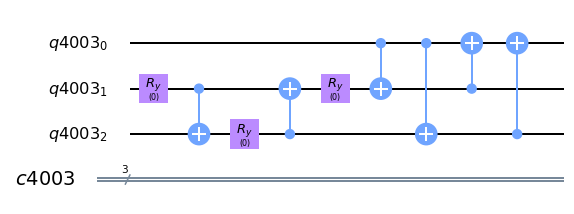

In [20]:
theta1 = 0
theta2 = 0
theta3 = 0

# prepare a circuit for clone 1
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circ = QuantumCircuit(qr, cr)

circ = cloner_circuit(circ, theta1, theta2, theta3)
circ.draw(output='mpl')

Here we see two parts: the first part is an ancillary state preparation, which serves as *a program* for the future action of the cloner part, and the second part is the cloning action, which distributes information between the target state and the ancillary qubits. Now lets see the outcome of the circuit with proper rotation parameters from <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.56.3446">Buzek et al. (1997)</a> for different target states.

In [10]:
# We will need to do a quantum state tomography - a reconstruction of the density matrix of 
# a quantum state from the measurements in different bases. We import qiskit functions from
# a dedicated module to do the task.
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

def ancilla_state_prep(circuit, theta1, theta2, theta3):
    """
    A function, which prepares the state of the ancillary qubits
    of the quantum circuit from the paper by Buzek et al. (1997).
    
    Input: 
        circuit - an object representing the quantum circuit.
        theta1, theta2, theta3 - rotation angles of the initial ancillary state.
    Output:
        A circuit object with prepared ancillary qubits state.
    """
    circuit.ry(theta1, 1)
    circuit.cx(1, 2)
    circuit.ry(theta2, 2)
    circuit.cx(2, 1)
    circuit.ry(theta3, 1)
    
    return circuit

def cloner(circuit):
    """
    A function, which does the cloning part in the 
    quantum circuit from the paper by Buzek et al. (1997).
    
    Input: 
        circuit - an object representing the quantum circuit.
    Output:
        A circuit object with implemented cloning unitary.
    """
    circuit.cx(0, 1)
    circuit.cx(0, 2)
    circuit.cx(1, 0)
    circuit.cx(2, 0)
    
    return circuit

def cloner_circuit(circuit, theta1, theta2, theta3):
    """
    A function, which implements the full cloning circuit
    from the paper by Buzek et al. (1997).
    
    Input: 
        circuit - an object representing the quantum circuit.
    Output:
        A circuit object with implemented cloning unitary.
    """    
    circuit = ancilla_state_prep(circuit, theta1, theta2, theta3)
    circuit = cloner(circuit)
    
    return circuit

def universal_quantum_cloning(initial_state):
    """
    A function, which implements the universal quantum cloning machine
    from the paper by Buzek and Hillery (1996).
    
    Input: 
        initial state - a target state so be cloned.
    Output:
        A couple of density matrices rho_clone1 and rho_clone2
        of the clones of the target state.
    """
    
    theta1 = 2*np.pi/8
    theta2 = -2*np.arcsin( np.sqrt(0.5-np.sqrt(2)/3) )
    theta3 = 2*np.pi/8
    
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    circ = QuantumCircuit(qr, cr)

    circ.initialize(initial_state, qr[0])
    circ = cloner_circuit(circ, theta1, theta2, theta3)
    circ.barrier(qr)
    
    #  obtaining the first clone of the target state
    qst_circ1 = state_tomography_circuits(circ, qr[1])
    job = execute(qst_circ1, Aer.get_backend('qasm_simulator'), shots=8192)

    tomo_circ = StateTomographyFitter(job.result(), qst_circ1)

    rho_clone1 = tomo_circ.fit()
    Fidelity1 = state_fidelity(initial_state, rho_clone1)
    
    #  obtaining the first clone of the target state
    qst_circ2= state_tomography_circuits(circ, qr[2])
    job = execute(qst_circ2, Aer.get_backend('qasm_simulator'), shots=8192)

    tomo_circ2= StateTomographyFitter(job.result(), qst_circ2)

    rho_clone2 = tomo_circ2.fit()
    Fidelity2 = state_fidelity(initial_state, rho_clone2)
    
    print('First clone fidelity: ', Fidelity1, ', First clone infidelity: ', 1 - Fidelity1)
    print('Second clone fidelity: ', Fidelity2, ', Second clone infidelity: ', 1 - Fidelity2)
    
    return (rho_clone1, rho_clone2)

In [11]:
"""
Uncomment different initial states here to see that the universal quantum cloning machine
is indeed universal: the quality of clones does not depend in the input qubit state
"""
initial_state = np.array([1, 0])                                # |0> state
#initial_state = np.array([0, 1])                                # |1> state
#initial_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])          # |+> state
#initial_state = np.array([1/np.sqrt(2), -1/np.sqrt(2)])         # |-> state
#initial_state = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])         # |i+> state
#initial_state = np.array([1/np.sqrt(2), -1j/np.sqrt(2)])        # |i-> state
#initial_state = random_state(2)                                 # an arbitrary qubit state                  

universal_quantum_cloning(initial_state);

First clone fidelity:  0.8320312495545283 , First clone infidelity:  0.16796875044547166
Second clone fidelity:  0.8347167964100978 , Second clone infidelity:  0.16528320358990223


We see that the resulting clones fidelity is (up to statistical precision of $1/\sqrt N \approx 0.01$, where N = 8192) in agreement with the exact value of $5/6 \approx 0.833$. This cloning machine allows us to reach better results than trivial ones, and this is optimal for unknown qubit states: **if one has no additional information, there is no way to prepare a clone with higher fidelity than that**. This is an amazing fact of what is possible in quantum mechanics!

### **Phase covariant quantum cloner for qubit states**

Consider the situation when you want to clone an unknown quantum state of the qubit and **you have some a priori information**, in particular, that **the target state belongs to a specific subset of the Bloch sphere**. As we will discuss later, this is very close to what appears in practical applications of quantum mechanics. In that case, cloning states from the whole Bloch sphere will be suboptimal: we know that our target states will not appear elsewhere but on a specific subset of the Bloch sphere, and thus we want our cloner to copy only those states with as much fidelity as possible. If the cloning efficiency depends on the input state, this is a **state-dependent (non-universal)** quantum cloning machine. The advantage of such cloning is a possibility to get clones with higher fidelity with a price of non-universality. As there are many situations where target states belong to some subset, this is a very important class of quantum cloning machines. 

What we are going to look at next is an example of a quantum cloning that can copy quantum states from a particular plane of the Bloch sphere. This cloning machine is called **phase covariant**, because it is independent of a rotation angle, which parametrizes states inside this plane. If  it is XY plane, states have the form

$\left|{\psi(\phi)}\right\rangle = \frac{1}{\sqrt{2}}(\left|{0}\right\rangle + e^{i\phi}\left|{1}\right\rangle)$

where $\phi$ is a quantum phase. This was an original proposal of such a cloner in the work of <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.62.012302">Bruss et al. (2000)</a> and the reason it is called phase-covariant. The action of the cloner unitary on qubit basis states:

$\left|{0}\right\rangle\left|{0}\right\rangle \longrightarrow \left|{0}\right\rangle\left|{0}\right\rangle$

$\left|{1}\right\rangle\left|{0}\right\rangle \longrightarrow \cos\eta\left|{1}\right\rangle\left|{0}\right\rangle + \sin\eta\left|{0}\right\rangle\left|{1}\right\rangle$

with $\eta \in [0, 2\pi]$.

By linearity, for an arbitrary qubit state $\left|\psi(\phi)\right\rangle$:

$\left|{\psi(\phi)}\right\rangle\left|{0}\right\rangle \longrightarrow \frac{1}{2}(\left|{0}\right\rangle\left|{0}\right\rangle + \cos\eta e^{i\phi}\left|{1}\right\rangle\left|{0}\right\rangle + \sin\eta e^{i\phi}\left|{0}\right\rangle\left|{1}\right\rangle)$

The fidelity of two resulting clones are:

$F_{A} = \frac{1}{2}(1 + \cos\eta)$

$F_{B} = \frac{1}{2}(1 + \sin\eta)$

For the optimal symmetric cloning one requires $F_{A}$ = $F_{B}$, immediately obtaining $\eta = \pi/4$ and $F_{A}$ = $F_{B}$ = $\frac{1}{2}(1 + \frac{1}{\sqrt{2}}) \approx 0.8535$

Let's implement this quantum cloning machine using qiskit. It was demonstrated in a work by <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.65.012304">Fan et al.(2001)</a> that the quantum circuit from above is capable of implementing phase-covariant quantum cloning in both XY and XZ planes of the Bloch sphere using different rotation parameters.

In [12]:
def phase_covariant_quantum_cloning(initial_state, plane):
    """
    A function, which implements the phase-covariant quantum cloning machine
    from the paper by Bruss et al. (2000).
    
    Input: 
        initial state - a target state so be cloned.
        plane - a choise of the particular plane of
                the Bloch sphere ('xz' or 'xy')
    Output:
        A couple of density matrices rho_clone1 and rho_clone2
        of the clones of the target state.
    """
    # choosing a plane of phase-covariance: x-y or x-z
    if plane == 'xy':
        theta1 = 2*np.arcsin( np.sqrt(0.5-1/(2*np.sqrt(3))) )
        theta2 = -2*np.arcsin( np.sqrt(0.5-np.sqrt(3)/4) )
        theta3 = 2*np.arcsin( np.sqrt(0.5-1/(2*np.sqrt(3))) )
    elif plane == 'xz':
        theta1 = 2*np.arcsin( np.sqrt(0.5-1/np.sqrt(8) ) )
        theta2 = 0
        theta3 = 2*np.arcsin( np.sqrt(0.5-1/np.sqrt(8) ) )
    
    # prepare a circuit for cloning
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    circ = QuantumCircuit(qr, cr)

    circ.initialize(initial_state, qr[0])
    circ = ancilla_state_prep(circ, theta1, theta2, theta3)
    circ = cloner(circ)
    circ.barrier(qr)
    
    # obtaining density matrix for the first clone
    qst_circ1 = state_tomography_circuits(circ, qr[1])
    job = execute(qst_circ1, Aer.get_backend('qasm_simulator'), shots=8192)

    tomo_circ1 = StateTomographyFitter(job.result(), qst_circ1)
    
    rho_clone1 = tomo_circ1.fit()
    Fidelity1 = state_fidelity(initial_state, rho_clone1)
    
    # obtaining density matrix for the second clone
    qst_circ2 = state_tomography_circuits(circ, qr[2])
    job = execute(qst_circ2, Aer.get_backend('qasm_simulator'), shots=8192)

    tomo_circ2 = StateTomographyFitter(job.result(), qst_circ2)
    
    rho_clone2 = tomo_circ2.fit()
    Fidelity2 = state_fidelity(initial_state, rho_clone2)
    
    print('First clone fidelity: ', Fidelity1, ', First clone infidelity: ', 1 - Fidelity1)
    print('Second clone fidelity: ', Fidelity2, ', Second clone infidelity: ', 1 - Fidelity2)
    
    return (rho_clone1, rho_clone2)

In [13]:
"""
Uncomment different initial states here to explore the opportunities of
the phase covariant cloner. Remember, that this quantum cloning machine
is optimized for a particular plane of the Bloch sphere (xy plane or xz
plane), so the cloning quality will be worse if a wrong state is chosen!
"""
initial_state = np.array([1, 0])                                # |0> state
#initial_state = np.array([0, 1])                                # |1> state
#initial_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])          # |+> state
#initial_state = np.array([1/np.sqrt(2), -1/np.sqrt(2)])         # |-> state
#initial_state = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])         # |i+> state
#initial_state = np.array([1/np.sqrt(2), -1j/np.sqrt(2)])        # |i-> state
#initial_state = random_state(2)                                 # an arbitrary qubit state  

phase_covariant_quantum_cloning(initial_state, 'xz');

First clone fidelity:  0.8505859368978332 , First clone infidelity:  0.14941406310216676
Second clone fidelity:  0.8582763665179084 , Second clone infidelity:  0.1417236334820916


## **Why is this interesting?**

Understanding the imperfect cloning of an unknown quantum state along with the no-cloning theorem allows seeing differences between classical and quantum worlds. While in the classic, there are no principal limits on copying information from the physical carrier,  but in quantum mechanics, it is limited with basic principles. This limitation is related to relativity. In particular, if one can make a perfect copy of an unknown quantum state, then superluminal interactions are possible. To see this, recall the EPR experiment, where Alice and Bob share a pair of entangled qubits. If Bob can make infinite many perfect copies of his subsystem state, he can use these copies to find out what basis has Alice chosen. 

If we remember where this property of quantum states has a crucial role, a **quantum cryptography** (or **quantum key distribution (QKD)**) comes to mind. In quantum cryptography, an adversary (usually called Eve) is concerned about how much information he can pull out of a signal state, which Alice sends to Bob. Eve has several strategies of attacking this state, and there is always an   **optimal** one. It happens that these strategies coincide with different ways of optimal cloning. 

To see this on a particular example, let's look at the first and the most known QKD protocol - BB84 by Bennet and Brassard. The first steps we are interested in are the following:

1. Alice chooses randomly (50/50) one of the two basis sets: {$\left|{+}\right\rangle$, $\left|{-}\right\rangle$} or {$\left|{i+}\right\rangle$, $\left|{i-}\right\rangle$}; then Alice chooses randomly (50/50) a quantum bit, encoded as a state from one of the basis sets (e.g., $\left|{+}\right\rangle$ state); finally, Alice sends this state into the quantum channel.

2. Eve attacks the quantum channel, trying to get information about the unknown quantum state, sent by Alice. She can measure this state and resend the result (**the intercept-resend attack**), or she can use an ancillary quantum system to unitary evolve with the target state without doing a measurement of the latter (**the unitary attack**). 

3. Bob receives a state from the quantum channel. He makes a random measurement basis choice (50\50), and in case of basis coincidence with Alice, he obtains one bit of the raw key (a string of bits before privacy amplification procedure).

After N acts of communication, Bob has N classical bits of information. He will sacrifice part of these bits to estimate the error in the communication procedure. If this error is above some limit (**a critical error**), then the communication shuts down, and it is impossible to produce a secret key from the distributed bits. Otherwise the secret key can be produced with further error correction and privacy amplification (to see a more elaborate introduction to BB84 QKD protocol see tutorials <a href="https://github.com/rugantio/Quantum_crypto/blob/master/Introduction.ipynb">Introduction to Quantum Cryptography</a>, <a href="https://github.com/Qiskit/qiskit-community-tutorials/blob/1cf11ad977aec8e0680e32c38110aa8cf3677e60/awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb">Quantum Cryptography</a> and <a href="https://github.com/Qiskit/qiskit-community-tutorials/blob/1cf11ad977aec8e0680e32c38110aa8cf3677e60/awards/teach_me_qiskit_2018/quantum_cryptography_qkd/Quantum_Cryptography2.ipynb">Quantum Cryptography: Quantum Key Distribution</a>).

A question of the protocol secrecy for BB84 was a subject of many works during the last decades, and there are critical error values calculated for every kind of attack:

$Q_{crit} = 0.25$ for the intercept-resend attack;

$Q_{crit} = 0.1464$ for the incoherent unitary attack;

$Q_{crit} \approx 0.11$ for the collective unitary attack.

An important question that follows every such critical value is **what an adversary should do to reach these bounds**? 

For the "intercept-resend" attack, Eve measures every qubit passing through the quantum channel and resends the outcome to Bob with a new quantum state. The 0.25 critical error value is the consequence of dimensionality of the qubit Hilbert space;

For the incoherent attack, Eve brings the signal state to unitary evolution U with her ancillary system and stores it in her quantum memory until Alice and Bob reveal their choices of basis. After that, Eve **individually measures** every stored state.

For the collective attack, Eve brings the signal state to unitary evolution U with her ancillary system and then stores it in her quantum memory until Alice and Bob reveal their choices of basis. After that, Eve **collectively measures** (all states as one) her stored states.

**What are those unitaries U which give Eve optimal information distribution between the target states and her ancilla?**

If we recall the value of infidelity ("1 - fidelity") for the phase-covariant cloning and compare it to optimal incoherent attack error rate, we will see that they coincide.  It turns out that **the phase-covariant quantum cloning is the optimal eavesdropper incoherent attack for BB84 QKD protocol!** 

There are many more cloning machines out there (see for further reading reviews <a href="https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.77.1225"> Rev. Mod. Phys. 77, 1225</a>, <a href="https://www.sciencedirect.com/science/article/abs/pii/S0370157314002099?via%3Dihub">Physics Reports 544, 241-322 (2014)</a>), developing alongside with the field of quantum communication and serving as a valid instrument to test secrecy issues.  Because quantum cloning is related to the no-signaling requirement and to our capabilities to obtain information from quantum states, it is important for our understanding of quantum mechanical properties and applications.

## ***References***

This paper introduces the no-cloning theorem:

[0] W. K. Wootters and W. H. Zurek, *A single quantum cannot be cloned*, 
<a href="https://www.nature.com/articles/299802a0">Nature 299, 802–803 (1982)</a>

Check these comprehensive reviews and dive into the vast ocean of quantum cloning machines and their applications!

[1] V. Scarani, S. Iblisdir, N. Gisin and A. Acin, *Quantum cloning*,
<a href="https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.77.1225">Rev. Mod. Phys. 77, 1225</a>

[2] H. Fan et al., *Quantum Cloning Machines and the Applications*,
<a href="https://www.sciencedirect.com/science/article/abs/pii/S0370157314002099?via%3Dihub">Physics Reports 544, 241-322 (2014)</a>

These papers introduce the universal quantum cloning machine and the phase-covariant cloning machine.

[3] V. Bužek and M. Hillery, *Quantum copying: Beyond the no-cloning theorem*,
<a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.54.1844">Phys. Rev. A 54, 1844 (1996)</a>

[4] D. Bruß, M. Cinchetti, G. M. D’Ariano, and C. Macchiavello, *Phase-covariant quantum cloning*,
<a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.62.012302">Phys. Rev. A 62, 012302 (2000)</a>

These papers describe a quantum circuit that implements the mentioned quantum cloning machines.

[5] V. Bužek, S. L. Braunstein, M. Hillery, and D. Bruß, *Quantum copying: A network*,
<a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.56.3446">Phys. Rev. A 56, 3446 (1997)</a>

[6] H. Fan, K. Matsumoto, X.-B. Wang, and M. Wadati, *Quantum cloning machines for equatorial qubits*,
<a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.65.012304">Phys. Rev. A 65, 012304 (2001)</a>